In [14]:
from nba_api.stats import endpoints
from nba_api.stats.endpoints import playercareerstats
import json
import pandas as pd
import requests
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = endpoints.leagueleaders.LeagueLeaders() 
df_league_leaders = data.league_leaders.get_data_frame()

In [3]:
df_league_leaders.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,203078,1,Bradley Beal,WAS,36,1284,407,838,0.486,80,...,191,167,48,15,115,88,1159,1005,1.45,0.42
1,203081,2,Damian Lillard,POR,38,1374,357,791,0.451,166,...,170,303,37,10,127,63,1158,1098,2.39,0.29
2,203507,3,Giannis Antetokounmpo,MIL,39,1333,413,733,0.563,44,...,459,241,49,52,144,117,1135,1345,1.67,0.34
3,201939,4,Stephen Curry,GSW,39,1316,375,789,0.475,182,...,208,243,53,3,120,72,1130,1088,2.03,0.44
4,203897,5,Zach LaVine,CHI,39,1381,398,750,0.531,138,...,202,197,39,18,148,100,1109,1036,1.33,0.26


In [7]:
from nba_api.stats.static import players
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players[:5]

Number of players fetched: 4501


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

In [11]:
#Search for a specific player
lebron = [player for player in  nba_players
          if player['full_name'] == 'LeBron James'][0]
lebron
#Lebron ID = 2544

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [1]:
from nba_api.stats.endpoints import playercareerstats
career = playercareerstats.PlayerCareerStats(player_id='2544')
lebron_data = career.get_data_frames()[0]
lebron_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


In [16]:
lebron_scoring_df = lebron_data[["SEASON_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "PTS" ]]
lebron_scoring_df

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,PTS
0,2003-04,CLE,19.0,1654
1,2004-05,CLE,20.0,2175
2,2005-06,CLE,21.0,2478
3,2006-07,CLE,22.0,2132
4,2007-08,CLE,23.0,2250
5,2008-09,CLE,24.0,2304
6,2009-10,CLE,25.0,2258
7,2010-11,MIA,26.0,2111
8,2011-12,MIA,27.0,1683
9,2012-13,MIA,28.0,2036


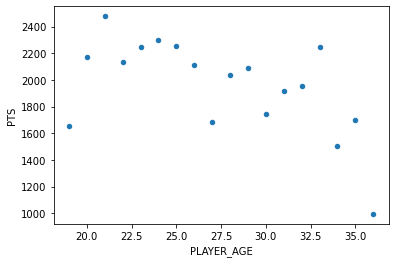

In [19]:
lebron_scoring_df.plot(kind='scatter', x='PLAYER_AGE', y='PTS')

In [20]:
#Find Kobe Bryant's ID
kobe = [player for player in  nba_players
          if player['full_name'] == 'Kobe Bryant'][0]
kobe

{'id': 977,
 'full_name': 'Kobe Bryant',
 'first_name': 'Kobe',
 'last_name': 'Bryant',
 'is_active': False}

In [25]:
kobe_career = playercareerstats.PlayerCareerStats(player_id='977')
kobe_data = kobe_career.get_data_frames()[0]
kobe_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,977,1996-97,00,1610612747,LAL,18.0,71,6,1102.0,176,...,0.819,47,85,132,91,49,23,112,102,539
1,977,1997-98,00,1610612747,LAL,19.0,79,1,2056.0,391,...,0.794,79,163,242,199,74,40,157,180,1220
2,977,1998-99,00,1610612747,LAL,20.0,50,50,1896.0,362,...,0.839,53,211,264,190,72,50,157,153,996
3,977,1999-00,00,1610612747,LAL,21.0,66,62,2524.0,554,...,0.821,108,308,416,323,106,62,182,220,1485
4,977,2000-01,00,1610612747,LAL,22.0,68,68,2791.0,701,...,0.853,104,295,399,338,114,43,220,222,1938
5,977,2001-02,00,1610612747,LAL,23.0,80,80,3065.0,749,...,0.829,112,329,441,438,118,35,223,228,2019
6,977,2002-03,00,1610612747,LAL,24.0,82,82,3404.0,868,...,0.843,106,458,564,481,181,67,288,218,2461
7,977,2003-04,00,1610612747,LAL,25.0,65,64,2452.0,516,...,0.852,103,256,359,330,112,28,171,176,1557
8,977,2004-05,00,1610612747,LAL,26.0,66,66,2689.0,573,...,0.816,95,297,392,398,86,53,270,174,1819
9,977,2005-06,00,1610612747,LAL,27.0,80,80,3277.0,978,...,0.850,71,354,425,360,147,30,250,233,2832


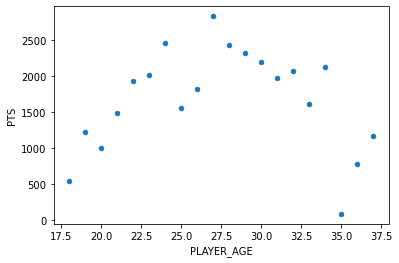

In [26]:
kobe_data.plot(kind='scatter', x='PLAYER_AGE', y='PTS')

In [28]:
#Find Micheal Jordan's ID
jordan = [player for player in  nba_players
          if player['full_name'] == 'Michael Jordan'][0]
jordan

{'id': 893,
 'full_name': 'Michael Jordan',
 'first_name': 'Michael',
 'last_name': 'Jordan',
 'is_active': False}

In [29]:
jordan_career = playercareerstats.PlayerCareerStats(player_id='893')
jordan_data = jordan_career.get_data_frames()[0]
jordan_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,3144.0,837,...,0.845,167,367,534,481,196,69,291,285,2313
1,893,1985-86,00,1610612741,CHI,23.0,18,7,451.0,150,...,0.840,23,41,64,53,37,21,45,46,408
2,893,1986-87,00,1610612741,CHI,24.0,82,82,3281.0,1098,...,0.857,166,264,430,377,236,125,272,237,3041
3,893,1987-88,00,1610612741,CHI,25.0,82,82,3311.0,1069,...,0.841,139,310,449,485,259,131,252,270,2868
4,893,1988-89,00,1610612741,CHI,26.0,81,81,3255.0,966,...,0.850,149,503,652,650,234,65,290,247,2633
5,893,1989-90,00,1610612741,CHI,27.0,82,82,3197.0,1034,...,0.848,143,422,565,519,227,54,247,241,2753
6,893,1990-91,00,1610612741,CHI,28.0,82,82,3034.0,990,...,0.851,118,374,492,453,223,83,202,229,2580
7,893,1991-92,00,1610612741,CHI,29.0,80,80,3102.0,943,...,0.832,91,420,511,489,182,75,200,201,2404
8,893,1992-93,00,1610612741,CHI,30.0,78,78,3067.0,992,...,0.837,135,387,522,428,221,61,207,188,2541
9,893,1994-95,00,1610612741,CHI,32.0,17,17,668.0,166,...,0.801,25,92,117,90,30,13,35,47,457


In [43]:
jordan_data.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Text(0, 0.5, 'Shooting Percentage (%)')

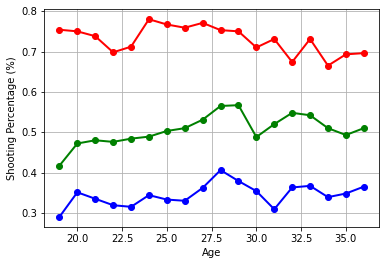

In [50]:
#Three point %, Free throw %, Field goal%
#graph showing all percentages for each players
#lebron_data.plot(kind='line', x="PLAYER_AGE", y='FG3_PCT')
lebron_3pt = lebron_data['FG3_PCT']
lebron_free = lebron_data['FT_PCT']
lebron_field = lebron_data['FG_PCT']
lebron_age = lebron_data['PLAYER_AGE']
plt.plot(lebron_age, lebron_3pt, marker='o', color='blue', linewidth=2)
plt.plot(lebron_age, lebron_free, marker='o', color='red', linewidth=2)
plt.plot(lebron_age, lebron_field, marker='o', color='green', linewidth=2)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Shooting Percentage (%)")

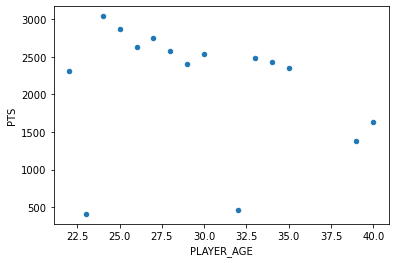

In [30]:
jordan_data.plot(kind='scatter', x='PLAYER_AGE', y='PTS')

In [33]:
x_axis = np.arange(17,40,1)

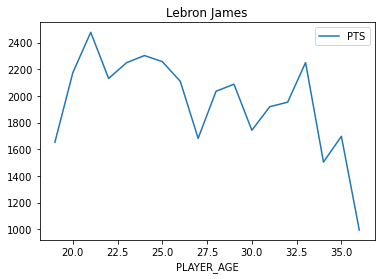

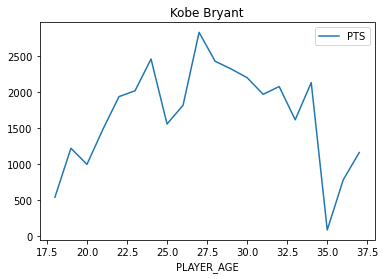

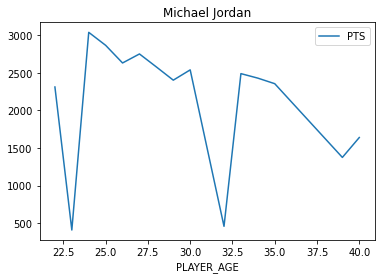

In [41]:
ax = lebron_data.plot(x="PLAYER_AGE", y = "PTS", kind='line', title="Lebron James")
kobe_data.plot(x="PLAYER_AGE", y = "PTS", kind='line', title="Kobe Bryant")
jordan_data.plot(x="PLAYER_AGE", y = "PTS", kind='line', title="Michael Jordan")


In [ ]:
#Merge dataframe
#first_combined_df = pd.merge(lebron_data, kobe_data)

In [4]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
from nba_api.stats.endpoints import cumestatsteam
nba_teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [18]:
cle = [team for team in  nba_teams
          if team['full_name'] == 'Cleveland Cavaliers'][0]
lak = [team for team in  nba_teams
          if team['full_name'] == 'Los Angeles Lakers'][0]
chi = [team for team in  nba_teams
          if team['full_name'] == 'Chicago Bulls'][0]
pprint(cle["id"])
pprint(lak["id"])
pprint(chi["id"])

1610612739
1610612747
1610612741


In [59]:
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import leaguegamefinder

cle_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=cle["id"], season_nullable= '2005-06').get_data_frames()[0]


cle_05_06 = cumestatsteam.CumeStatsTeam(team_id="1610612739", season = "22005", game_ids = '0020501174').get_data_frames()[0]
#lak_05_06 = cumestatsteam.CumeStatsTeam(team_id="1610612747")
#chi_86_87 = cumestatsteam.CumeStatsTeam(team_id="1610612741")
cle_05_06

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [58]:
cle_games.head(20)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42005,1610612739,CLE,Cleveland Cavaliers,0040500207,2006-05-21,CLE @ DET,L,240,61,...,0.741,9,27,36,9,6,1,12,28,-18.0
1,42005,1610612739,CLE,Cleveland Cavaliers,0040500206,2006-05-19,CLE vs. DET,L,240,82,...,0.833,12,30,42,17,4,5,13,22,-2.0
2,42005,1610612739,CLE,Cleveland Cavaliers,0040500205,2006-05-17,CLE @ DET,W,240,86,...,0.731,19,25,44,15,9,10,12,27,2.0
3,42005,1610612739,CLE,Cleveland Cavaliers,0040500204,2006-05-15,CLE vs. DET,W,240,74,...,0.647,7,29,36,13,7,5,18,22,2.0
4,42005,1610612739,CLE,Cleveland Cavaliers,0040500203,2006-05-13,CLE vs. DET,W,240,86,...,0.938,9,28,37,21,8,4,13,17,9.0
5,42005,1610612739,CLE,Cleveland Cavaliers,0040500202,2006-05-09,CLE @ DET,L,240,91,...,0.682,13,38,51,18,2,1,12,26,-6.0
6,42005,1610612739,CLE,Cleveland Cavaliers,0040500201,2006-05-07,CLE @ DET,L,240,86,...,0.833,16,21,37,14,3,3,10,17,-27.0
7,42005,1610612739,CLE,Cleveland Cavaliers,0040500136,2006-05-05,CLE @ WAS,W,265,114,...,0.808,9,35,44,24,11,3,14,30,1.0
8,42005,1610612739,CLE,Cleveland Cavaliers,0040500135,2006-05-03,CLE vs. WAS,W,265,121,...,0.744,15,31,46,15,5,3,12,26,1.0
9,42005,1610612739,CLE,Cleveland Cavaliers,0040500134,2006-04-30,CLE @ WAS,L,240,96,...,0.760,9,30,39,15,6,4,22,34,-10.0


In [44]:
from nba_api.stats.endpoints import teamyearbyyearstats
cle_teamyear_df = teamyearbyyearstats.TeamYearByYearStats(team_id = 1610612739)
cle_teamyear_df = cle_teamyear_df.get_data_frames()[0]
cle_teamyear_df_0506 = cle_teamyear_df.loc[cle_teamyear_df["YEAR"] == "2005-06"]
cle_teamyear_df_0506

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
35,1610612739,Cleveland,Cavaliers,2005-06,82,50,32,0.61,3,2,...,959,2511,3470,1560,1733,567,1137,392,8002,15


In [45]:
cle_teamyear_df

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612739,Cleveland,Cavaliers,1970-71,82,15,67,0.183,8,4,...,0,0,0,2065,2114,0,0,0,8373,17
1,1610612739,Cleveland,Cavaliers,1971-72,82,23,59,0.280,7,4,...,0,0,0,2060,1936,0,0,0,8674,16
2,1610612739,Cleveland,Cavaliers,1972-73,82,32,50,0.390,6,4,...,0,0,0,2106,1941,0,0,0,8418,17
3,1610612739,Cleveland,Cavaliers,1973-74,82,29,53,0.354,7,4,...,1275,2492,3767,2048,1925,598,1545,293,8221,17
4,1610612739,Cleveland,Cavaliers,1974-75,82,40,42,0.488,5,3,...,1058,2502,3560,1903,1881,600,1462,348,8117,16
5,1610612739,Cleveland,Cavaliers,1975-76,82,49,33,0.598,2,1,...,1192,2588,3780,1844,1871,638,1330,397,8340,17
6,1610612739,Cleveland,Cavaliers,1976-77,82,43,39,0.524,6,4,...,1312,2563,3875,1845,1951,579,1356,472,8370,20
7,1610612739,Cleveland,Cavaliers,1977-78,82,43,39,0.524,4,3,...,1187,2676,3863,1740,1832,692,1382,455,8561,19
8,1610612739,Cleveland,Cavaliers,1978-79,82,30,52,0.366,8,4,...,1229,2256,3485,1796,2027,688,1376,334,8732,20
9,1610612739,Cleveland,Cavaliers,1979-80,82,37,45,0.451,8,4,...,1307,2381,3688,2108,1934,764,1370,342,9360,3
